Problem Statement:❓
Using different techniques of Machine Learning, we need to build a Recommender System that recommends movies based on “ Cast, Genre, Reviews, TMDB/IMDB ratings”

Using different types of recommendation techniques like:
1. Popularity based recommender system
2. Content based Recommender System
3. Collaborative Recommender System


# Importing dependencies 

In [ ]:
from google.colab import drive
from google.colab import files
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
credits=pd.read_csv(r"/content/drive/MyDrive/MRS/credits.csv")
movies=pd.read_csv(r"/content/drive/MyDrive/MRS/movies_metadata.csv",low_memory=False)
keywords=pd.read_csv(r"/content/drive/MyDrive/MRS/keywords.csv")
links=pd.read_csv('/content/drive/MyDrive/MRS/links_small.csv')
rating=pd.read_csv('/content/drive/MyDrive/MRS/ratings_small.csv')

In [ ]:
print('Shape of Credits:',credits.shape)
print('Shape of Movies:',movies.shape)
print('Shape of keywords:',keywords.shape)
print('Shape of links:',links.shape)
print('Shape of rating:',rating.shape)

Shape of Credits: (45476, 3)
Shape of Movies: (45466, 24)
Shape of keywords: (46419, 2)
Shape of links: (9125, 3)
Shape of rating: (100004, 4)


In [ ]:
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [ ]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [ ]:
credits.describe()

,id
count,45476.000000
mean,108345.997537
std,112443.796536
min,2.000000
25%,26443.250000
50%,60002.500000
75%,157302.000000
max,469172.000000


In [ ]:
print(credits.columns)

Index(['cast', 'crew', 'id'], dtype='object')


In [ ]:
movies.head().T

,0,1,2,3,4
adult,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000,65000000,0,16000000,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
imdb_id,tt0114709,tt0113497,tt0113228,tt0114885,tt0113041
original_language,en,en,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...


In [ ]:
movies.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [ ]:
#changing datatype of id column
movies = movies[movies['id'].str.isnumeric()]  # Keep only rows with numeric 'id' values
movies['id'] = movies['id'].astype(int)  # Convert 'id' column to integer

In [ ]:
print(movies.columns)

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')


In [ ]:
keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [ ]:
keywords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB


In [ ]:
print(keywords.columns)

Index(['id', 'keywords'], dtype='object')


In [ ]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
links.columns

Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')

In [ ]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9125 non-null   int64  
 1   imdbId   9125 non-null   int64  
 2   tmdbId   9112 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 214.0 KB


In [ ]:
links.describe()

,movieId,imdbId,tmdbId
count,9125.000000,9.125000e+03,9112.000000
mean,31123.291836,4.798244e+05,39104.545544
std,40782.633604,7.431774e+05,62814.519801
min,1.000000,4.170000e+02,2.000000
25%,2850.000000,8.884600e+04,9451.750000
50%,6290.000000,1.197780e+05,15852.000000
75%,56274.000000,4.284410e+05,39160.500000
max,164979.000000,5.794766e+06,416437.000000


In [ ]:
rating.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [ ]:
rating.describe()

,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


Count: There are a total of 100,004 ratings in the dataset.

Mean: The average rating is approximately 3.54 

Standard Deviation (std): The standard deviation of 1.06 This implies that the ratings tend to cluster closer to the average, indicating less disagreement among users.

Minimum (min) and Maximum (max):  rating scale ranges from 0.5 to 5, with a wide range of possible values.

In [ ]:
# Merge the two dataframes based on the 'id' column
df = pd.merge(credits, movies,  on='id')
df.head()


,cast,crew,id,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,tt0114709,en,...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,tt0113497,en,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,tt0113228,en,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0114885,en,...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt0113041,en,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
new_df = pd.merge(df, keywords, on='id')

 

In [ ]:
new_df.head()

,cast,crew,id,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,keywords
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,tt0114709,en,...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,tt0113497,en,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,tt0113228,en,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0114885,en,...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt0113041,en,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [ ]:
new_df.columns

Index(['cast', 'crew', 'id', 'adult', 'belongs_to_collection', 'budget',
       'genres', 'homepage', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'keywords'],
      dtype='object')

In [ ]:
new_df.shape

(46628, 27)

In [ ]:
new_df.isnull().sum()

cast                         0
crew                         0
id                           0
adult                        0
belongs_to_collection    42054
budget                       0
genres                       0
homepage                 38619
imdb_id                     17
original_language           11
original_title               0
overview                   995
popularity                   4
poster_path                399
production_companies         4
production_countries         4
release_date                88
revenue                      4
runtime                    268
spoken_languages             4
status                      86
tagline                  25845
title                        4
video                        4
vote_average                 4
vote_count                   4
keywords                     0
dtype: int64

In [ ]:
new_df.dropna(subset=['title','release_date'], inplace=True)

In [ ]:
#creating new feature year
# Convert the 'release_date' to datetime if it's not already in datetime format
new_df['release_date'] = pd.to_datetime(new_df['release_date'])

# Extract the year from the date
new_df['release_year'] = new_df['release_date'].dt.year 

In [ ]:
new_df['popularity'] = pd.to_numeric(new_df['popularity'], errors='coerce')
new_df['popularity'] = new_df['popularity'].round(2)

In [ ]:
new_df['popularity']

0        21.95
1        17.02
2        11.71
3         3.86
4         8.39
         ...  
46622     5.68
46624     0.18
46625     0.90
46626     0.00
46627     0.16
Name: popularity, Length: 46540, dtype: float64

In [ ]:
new_df['overview'].mode()[0]

'No overview found.'

In [ ]:
# Replace 'No overview found' and NaN with null string
new_df['overview'] = new_df['overview'].replace(['No overview found', np.nan], '')

In [ ]:
# Replace NaN with null string
new_df['tagline'] = new_df['tagline'].replace( np.nan, '')

In [ ]:
# Replace NaN values in 'original_language' column with 'Unknown'
new_df['original_language'].fillna('Unknown', inplace=True)


In [ ]:
mean_runtime = new_df['runtime'].mean()
# Fill NaN values in 'runtime' column with mean value


In [ ]:
new_df['runtime'].fillna(mean_runtime, inplace=True)
# Replace NaN values in 'original_language' column with 'Unknown'
new_df['status'].fillna('Unknown', inplace=True)

I will use IMDB's weighted rating formula to construct my chart. Mathematically, it is represented as follows:

Weighted Rating (WR) =  ((v/(v+m)).R)+(m/v+m_.C)



where,

*   v is the number of votes for the movie

*   m is the minimum votes required to be listed in the chart

*   R is the average rating of the movie
*   C is the mean vote across the whole report







In [ ]:
vote_counts = new_df[new_df['vote_count'].notnull()]['vote_count'].astype('int')
vote_averages = new_df[new_df['vote_average'].notnull()]['vote_average'].astype('int')
mean_vote = vote_averages.mean()
total_votes = vote_counts.sum()

In [ ]:
# Define the minimum vote count threshold for considering a movie
min_vote_count=vote_counts.quantile(0.95) #min_vote_count
min_vote_count

426.0

 to qualify to be considered for the chart, a movie has to have at least 434 votes on TMDB

In [ ]:
# Compute the weighted rating for each movie
new_df['weighted_rating'] = (vote_counts / (vote_counts + min_vote_count)) * vote_averages + (min_vote_count / (vote_counts + min_vote_count)) * mean_vote

In [ ]:
new_df['vote_count'] = new_df['vote_count'].astype('int')
new_df['vote_average'] = new_df['vote_average'].astype('int')

In [ ]:
new_df.duplicated().sum()


1174

In [ ]:
new_df = new_df.drop_duplicates()

In [ ]:
new_df.head()

,cast,crew,id,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,keywords,release_year,weighted_rating
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,tt0114709,en,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,,Toy Story,False,7,5415,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",1995,6.871918
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,tt0113497,en,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6,2413,"[{'id': 10090, 'name': 'board game'}, {'id': 1...",1995,5.886535
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,tt0113228,en,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6,92,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...",1995,5.378133
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0114885,en,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6,34,"[{'id': 818, 'name': 'based on novel'}, {'id':...",1995,5.299724
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt0113041,en,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5,173,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...",1995,5.173411


# cleaning textual data

In [ ]:
new_df.iloc[500].genres #this is in form of string so we have to change it

"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 14, 'name': 'Fantasy'}, {'id': 878, 'name': 'Science Fiction'}]"

In [ ]:
#created a function to extract value of key name 
import ast

def extract_names(data):
    names = []
    parsed_data = ast.literal_eval(data)
    for item in parsed_data:
        if 'name' in item:
            name = item['name']
            names.append(name)
    return names


In [ ]:
new_df['genres']=new_df['genres'].apply(extract_names)

In [ ]:
new_df.iloc[0].keywords

"[{'id': 931, 'name': 'jealousy'}, {'id': 4290, 'name': 'toy'}, {'id': 5202, 'name': 'boy'}, {'id': 6054, 'name': 'friendship'}, {'id': 9713, 'name': 'friends'}, {'id': 9823, 'name': 'rivalry'}, {'id': 165503, 'name': 'boy next door'}, {'id': 170722, 'name': 'new toy'}, {'id': 187065, 'name': 'toy comes to life'}]"

In [ ]:
new_df['keywords']=new_df['keywords'].apply(extract_names)

In [ ]:
new_df.iloc[0].cast

"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4t

In [ ]:
#created a function to extract top 4 actor from cast
def extract_top_names(data, top_n):
    names = []
    parsed_data = ast.literal_eval(data)
    for item in parsed_data:
        name = item['name']
        names.append(name)
    top_names = names[:top_n]
    return top_names

In [ ]:
top_n = 3
new_df['cast']= new_df['cast'].apply(lambda x: extract_top_names(x, top_n))

In [ ]:
new_df['crew'][2]

"[{'credit_id': '52fe466a9251416c75077a89', 'department': 'Directing', 'gender': 2, 'id': 26502, 'job': 'Director', 'name': 'Howard Deutch', 'profile_path': '/68Vae1HkU1NxQZ6KEmuxIpno7c9.jpg'}, {'credit_id': '52fe466b9251416c75077aa3', 'department': 'Writing', 'gender': 2, 'id': 16837, 'job': 'Characters', 'name': 'Mark Steven Johnson', 'profile_path': '/6trChNn3o2bi4i2ipgMEAytwmZp.jpg'}, {'credit_id': '52fe466b9251416c75077aa9', 'department': 'Writing', 'gender': 2, 'id': 16837, 'job': 'Writer', 'name': 'Mark Steven Johnson', 'profile_path': '/6trChNn3o2bi4i2ipgMEAytwmZp.jpg'}, {'credit_id': '5675eb4b92514179dd003933', 'department': 'Crew', 'gender': 2, 'id': 1551320, 'job': 'Sound Recordist', 'name': 'Jack Keller', 'profile_path': None}]"

In [ ]:
#function to fetch director name from crew
def director(data):
    director=[]
    for i in ast.literal_eval(data):
        if i['job']=='Director':
            director.append(i['name'])
            break
    return director
            

In [ ]:
new_df['director']=new_df['crew'].apply(director)

In [ ]:
new_df.head()

,cast,crew,id,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,...,status,tagline,title,video,vote_average,vote_count,keywords,release_year,weighted_rating,director
0,"[Tom Hanks, Tim Allen, Don Rickles]","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,tt0114709,en,...,Released,,Toy Story,False,7,5415,"[jealousy, toy, boy, friendship, friends, riva...",1995,6.871918,[John Lasseter]
1,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,tt0113497,en,...,Released,Roll the dice and unleash the excitement!,Jumanji,False,6,2413,"[board game, disappearance, based on children'...",1995,5.886535,[Joe Johnston]
2,"[Walter Matthau, Jack Lemmon, Ann-Margret]","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,tt0113228,en,...,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6,92,"[fishing, best friend, duringcreditsstinger, o...",1995,5.378133,[Howard Deutch]
3,"[Whitney Houston, Angela Bassett, Loretta Devine]","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,False,NaN,16000000,"[Comedy, Drama, Romance]",NaN,tt0114885,en,...,Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6,34,"[based on novel, interracial relationship, sin...",1995,5.299724,[Forest Whitaker]
4,"[Steve Martin, Diane Keaton, Martin Short]","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,tt0113041,en,...,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5,173,"[baby, midlife crisis, confidence, aging, daug...",1995,5.173411,[Charles Shyer]


**# EDA**

In [ ]:
new_df.describe()

,id,popularity,revenue,runtime,vote_average,vote_count,release_year,weighted_rating
count,45366.000000,45366.000000,4.536600e+04,45366.000000,45366.000000,45366.000000,45366.000000,45366.000000
mean,108023.606137,2.926470,1.123399e+07,94.181506,5.250099,110.118238,1991.880020,5.306155
std,112165.809893,6.010149,6.439696e+07,38.237082,1.859061,491.795587,24.055565,0.232519
min,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1874.000000,3.533710
25%,26387.250000,0.390000,0.000000e+00,85.000000,5.000000,3.000000,1978.000000,5.236613
50%,59857.500000,1.130000,0.000000e+00,95.000000,6.000000,10.000000,2001.000000,5.247946
75%,156500.500000,3.690000,0.000000e+00,107.000000,6.000000,34.000000,2010.000000,5.280168
max,469172.000000,547.490000,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,7.919031




*  There are a total of 45,366 movies in the dataset
*   The average popularity score is approximately 2.93.


*   The range of release years in the dataset spans from 1874 to 2020
*  The average vote average is 5.25 .the average rating tends to be slightly above average


*   The average vote count is approximately 110.12
*   The average weighted rating is 5.31. 







In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45366 entries, 0 to 46627
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   cast                   45366 non-null  object        
 1   crew                   45366 non-null  object        
 2   id                     45366 non-null  int64         
 3   adult                  45366 non-null  object        
 4   belongs_to_collection  4488 non-null   object        
 5   budget                 45366 non-null  object        
 6   genres                 45366 non-null  object        
 7   homepage               7764 non-null   object        
 8   imdb_id                45352 non-null  object        
 9   original_language      45366 non-null  object        
 10  original_title         45366 non-null  object        
 11  overview               45366 non-null  object        
 12  popularity             45366 non-null  float64       
 13  p

In [ ]:
new_df['original_language'].value_counts()

en    32196
fr     2438
it     1528
ja     1351
de     1077
      ...  
la        1
fy        1
rw        1
tg        1
si        1
Name: original_language, Length: 90, dtype: int64

English is domination the moving data set

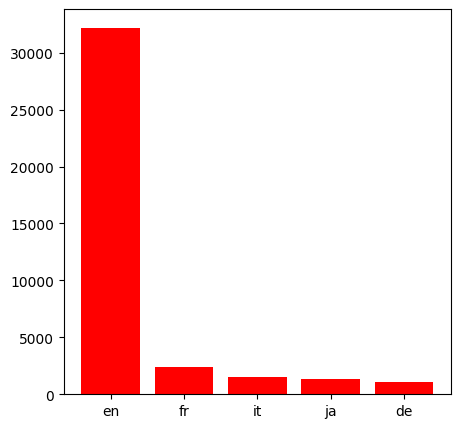

In [ ]:
plt.figure(figsize=(5,5))
plt.bar(list(new_df['original_language'].value_counts()[0:5].keys()),list(new_df['original_language'].value_counts()[0:5]),color="r")
plt.show()        

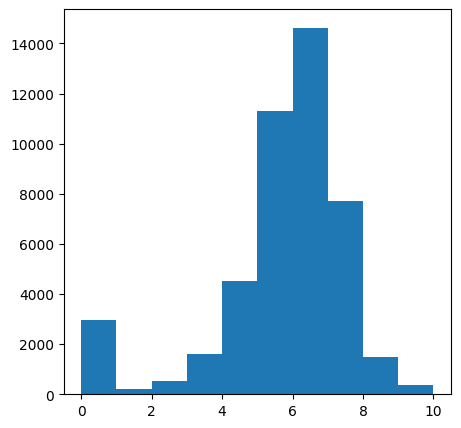

In [ ]:
plt.figure(figsize=(5,5))
plt.hist(new_df['vote_average'])
plt.show()

max voting average is lies in 6 to 8 range

In [ ]:
high_rated_movies=new_df[new_df['vote_average']>8]

In [ ]:
high_rated_movies.head()

,cast,crew,id,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,...,status,tagline,title,video,vote_average,vote_count,keywords,release_year,weighted_rating,director
186,"[Mia Farrow, Tony Goldwyn, Scott Glenn]","[{'credit_id': '561cd1ea9251415a7200351b', 'de...",58372,False,NaN,0,"[Fantasy, Comedy, Drama]",NaN,tt0114241,en,...,Released,The most twisted Christmas ever.,Reckless,False,10,1,"[trauma, game show, female protagonist, christ...",1995,5.254972,[Norman René]
394,"[Эрика Элениак, William McNamara, Michael Lerner]","[{'credit_id': '545bb5590e0a261fa9002264', 'de...",278939,False,NaN,0,"[Romance, Adventure, Crime, Drama]",NaN,tt0113173,en,...,Released,On our first date... we robbed a bank,Girl in the Cadillac,False,10,1,"[robbery, bank, cadillac, money, bus station]",1995,5.254972,[Lucas Platt]
713,"[Maila Nurmi, Dolores Fuller, Paul Marco]","[{'credit_id': '52fe4890c3a368484e0ff711', 'de...",73183,False,NaN,0,[Documentary],NaN,tt0113270,en,...,Released,Can your MIND stand the SHOCKING TRUTH?,"The Haunted World of Edward D. Wood, Jr.",False,10,1,[],1996,5.254972,[Brett Thompson]
745,"[Carmen Miranda, Aurora Miranda, Cesar Romero]","[{'credit_id': '52fe4ef19251416c911431d5', 'de...",255546,False,NaN,0,[Documentary],NaN,tt0109381,pt,...,Released,,Carmen Miranda: Bananas Is My Business,False,10,1,"[latin, profile, woman director]",1995,5.254972,[Helena Solberg]
1654,[Anna Levine],[],64562,False,NaN,0,[Drama],NaN,tt0119845,en,...,Released,,Other Voices Other Rooms,False,10,1,[],1995,5.254972,[]


In [ ]:
high_rated_movies.shape

(390, 30)

In [ ]:
top5_high=high_rated_movies.sort_values(by="vote_average",ascending=False).head()

In [ ]:
top5_high

,cast,crew,id,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,...,status,tagline,title,video,vote_average,vote_count,keywords,release_year,weighted_rating,director
186,"[Mia Farrow, Tony Goldwyn, Scott Glenn]","[{'credit_id': '561cd1ea9251415a7200351b', 'de...",58372,False,NaN,0,"[Fantasy, Comedy, Drama]",NaN,tt0114241,en,...,Released,The most twisted Christmas ever.,Reckless,False,10,1,"[trauma, game show, female protagonist, christ...",1995,5.254972,[Norman René]
29489,"[Lenore Zann, Geoffrey MacKay, Helene Udy]","[{'credit_id': '5800a6b4c3a3686b1b003ebd', 'de...",72178,False,NaN,0,[Comedy],NaN,tt0091682,en,...,Released,"What fantasy could be worth $50,000?",One Night Only,False,10,1,[],1986,5.254972,[Timothy Bond]
27779,[],"[{'credit_id': '572fa7f89251413bd9001d2f', 'de...",53543,False,NaN,0,[Animation],NaN,tt0252993,en,...,Released,,Claymation Comedy of Horrors,False,10,1,[],1991,5.254972,[Barry Bruce]
27842,"[Charles Laughton, Elsa Lanchester, Robert New...","[{'credit_id': '52fe4c599251416c75117b11', 'de...",180954,False,NaN,0,"[Comedy, Drama, Romance]",NaN,tt0030933,en,...,Released,,Vessel of Wrath,False,10,1,"[missionary, drunk]",1938,5.254972,[Erich Pommer]
27983,"[Lasse Kolsrud, Sofie Gråbøl, Bjørn Sundquist]","[{'credit_id': '52fe49cb9251416c910b8ee7', 'de...",87506,False,NaN,0,"[Action, Adventure, Fantasy, Drama, Romance]",NaN,tt0114081,en,...,Released,,Pan,False,10,1,[],1995,5.254972,[Henning Carlsen]


In [ ]:
average_ratings = top5_high['vote_average']
movie_titles = top5_high['title']

In [ ]:
top5_high['title'].unique()

array(['Reckless', 'One Night Only', 'Claymation Comedy of Horrors',
       'Vessel of Wrath', 'Pan'], dtype=object)

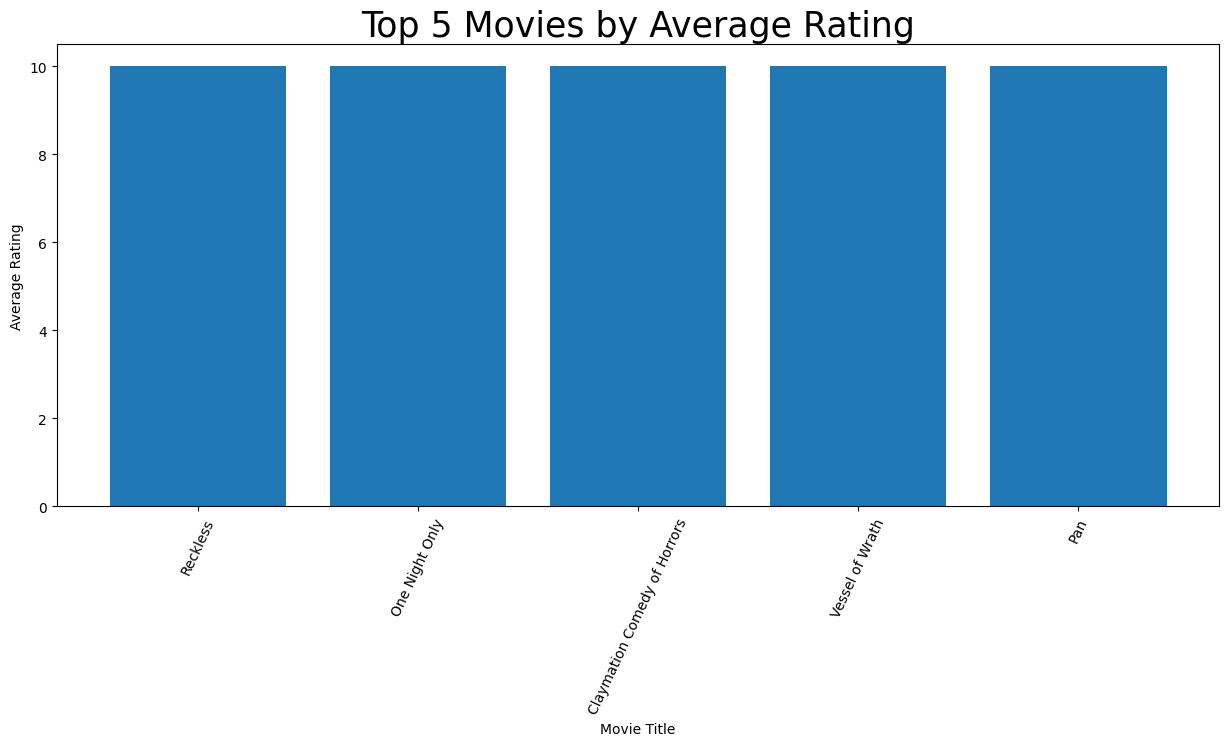

In [ ]:
plt.figure(figsize=(15, 6))
plt.bar(movie_titles, average_ratings)
plt.xlabel('Movie Title')
plt.ylabel('Average Rating')
plt.title('Top 5 Movies by Average Rating',fontsize=25)
plt.xticks(rotation=65)
plt.show()

In [ ]:
top5_revenue=new_df.sort_values(by="revenue",ascending=False).head()

In [ ]:
revenue = top5_revenue['revenue']
movie_titles = top5_revenue['title']

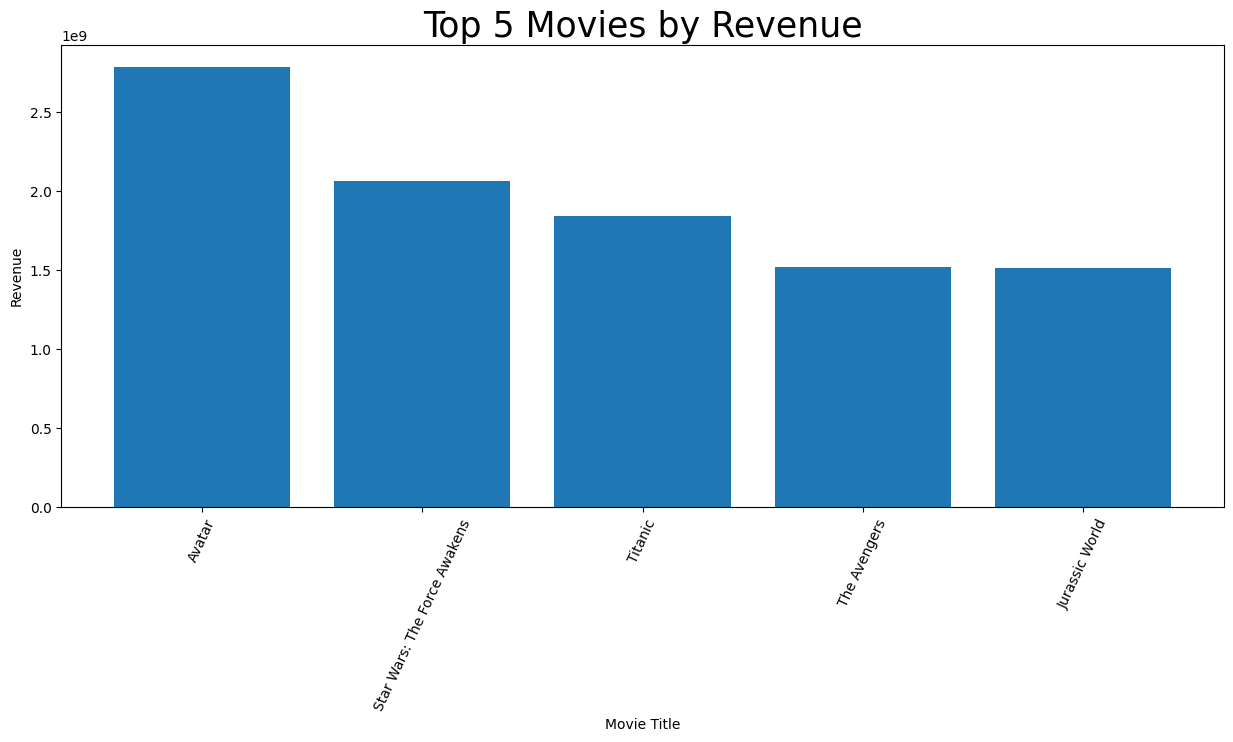

In [ ]:
plt.figure(figsize=(15, 6))
plt.bar(movie_titles, revenue)
plt.xlabel('Movie Title')
plt.ylabel('Revenue')
plt.title('Top 5 Movies by Revenue',fontsize=25)
plt.xticks(rotation=65)
plt.show()

In [ ]:
top5_runtime=new_df.sort_values(by="runtime",ascending=False).head()

In [ ]:
movie_title=top5_runtime['title']
runtime=(top5_runtime['runtime'])


In [ ]:
runtime

24380    1256.0
20168    1140.0
42104    1140.0
13918     931.0
14111     925.0
Name: runtime, dtype: float64

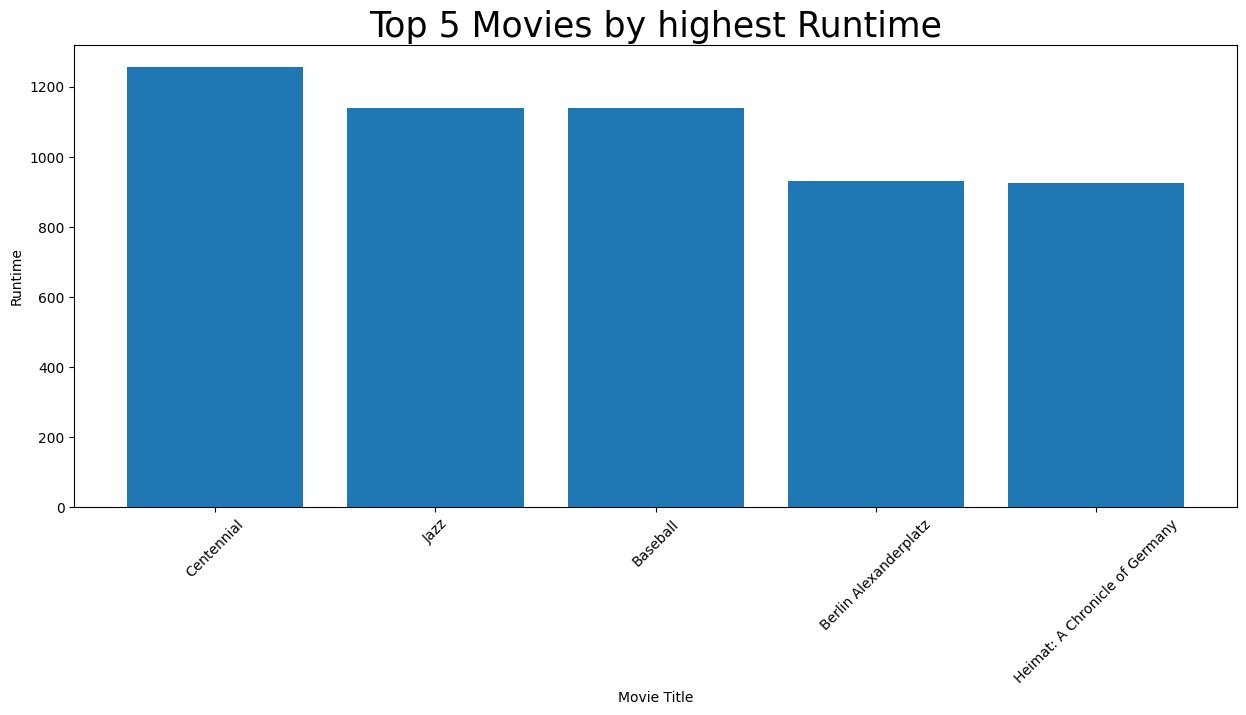

In [ ]:
plt.figure(figsize=(15, 6))
plt.bar(movie_title, runtime)
plt.xlabel('Movie Title')
plt.ylabel('Runtime')
plt.title('Top 5 Movies by highest Runtime',fontsize=25)
plt.xticks(rotation=45)
plt.show()

In [ ]:
new_df['runtime'].value_counts()

90.0     2548
0.0      1534
100.0    1470
95.0     1412
93.0     1213
         ... 
410.0       1
283.0       1
238.0       1
566.0       1
780.0       1
Name: runtime, Length: 354, dtype: int64

In [ ]:
top5_vote_count=new_df.sort_values(by="vote_count",ascending=False).head()

In [ ]:
movie=top5_vote_count['title']
vote_count=top5_vote_count['vote_count']

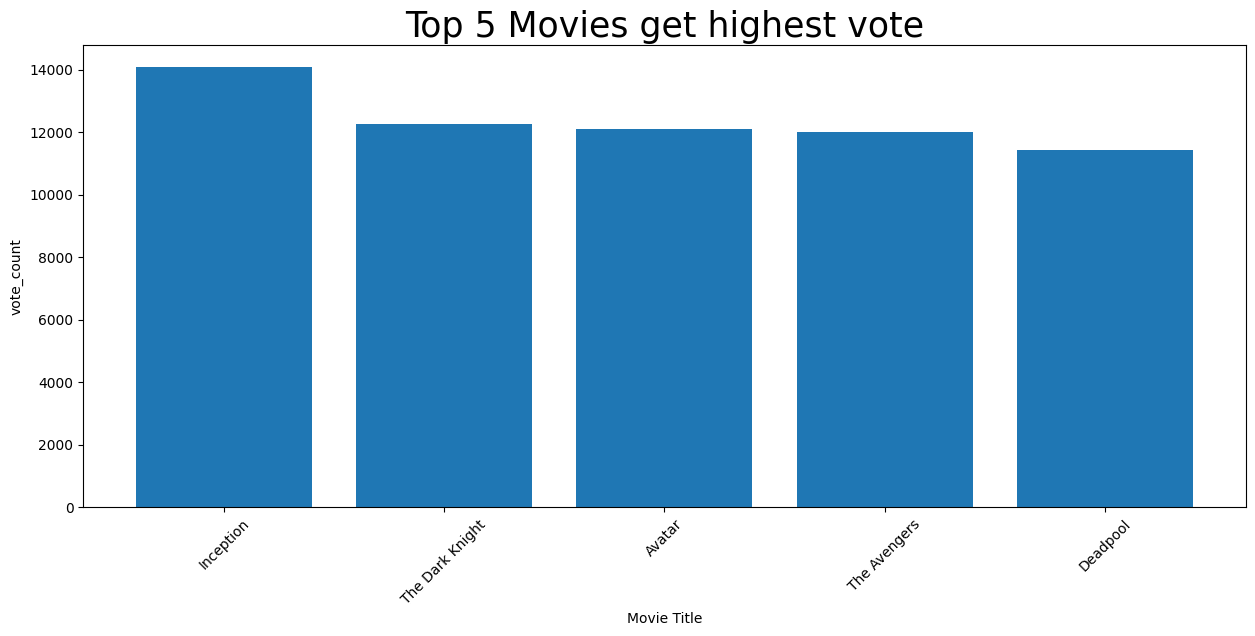

In [ ]:
plt.figure(figsize=(15, 6))
plt.bar(movie, vote_count)
plt.xlabel('Movie Title')
plt.ylabel('vote_count')
plt.title('Top 5 Movies get highest vote',fontsize=25)
plt.xticks(rotation=45)
plt.show()

inception get highest vote

In [ ]:
new_df['status'].value_counts()

Released           44927
Rumored              229
Post Production       97
Unknown               80
In Production         19
Planned               13
Canceled               1
Name: status, dtype: int64

In [ ]:
status=new_df['status'].value_counts()
status_title = status.index


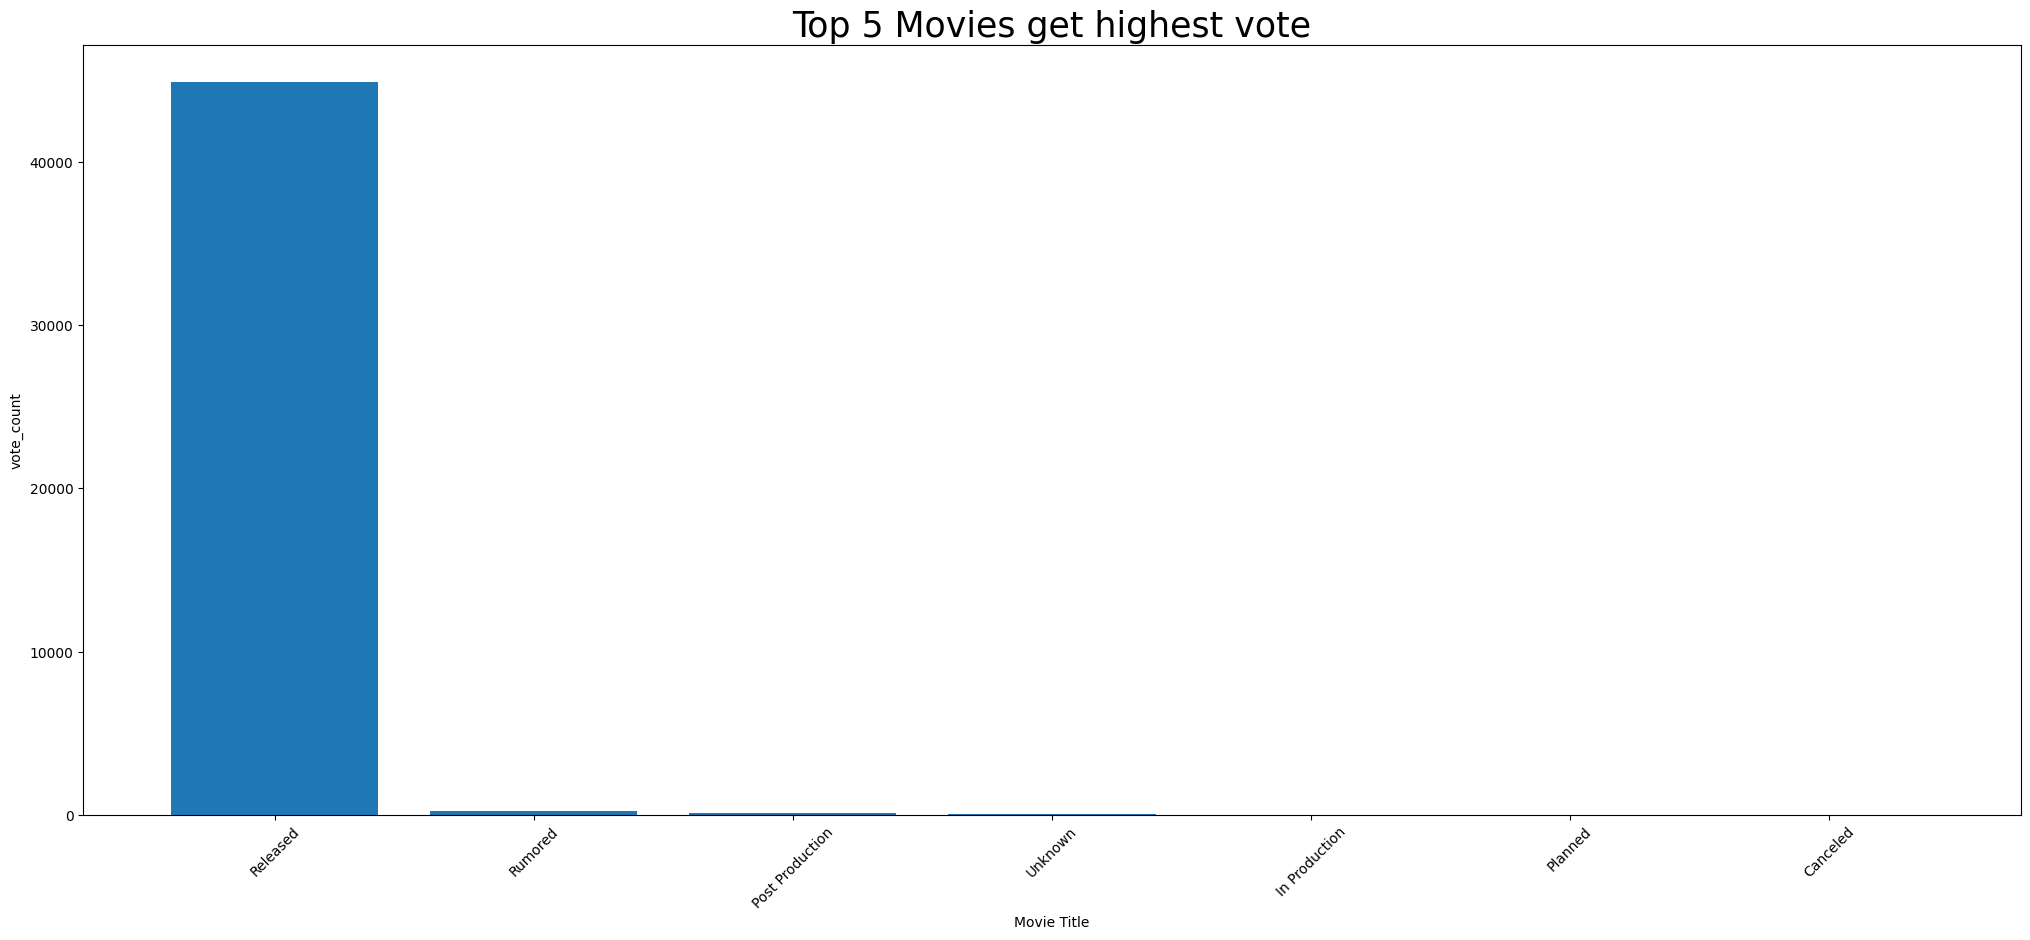

In [ ]:
plt.figure(figsize=(25, 10))
plt.bar(status_title, status)
plt.xlabel('Movie Title')
plt.ylabel('vote_count')
plt.title('Top 5 Movies get highest vote',fontsize=25)
plt.xticks(rotation=45)
plt.show()

In [ ]:
gen=df['genres'].astype('str')

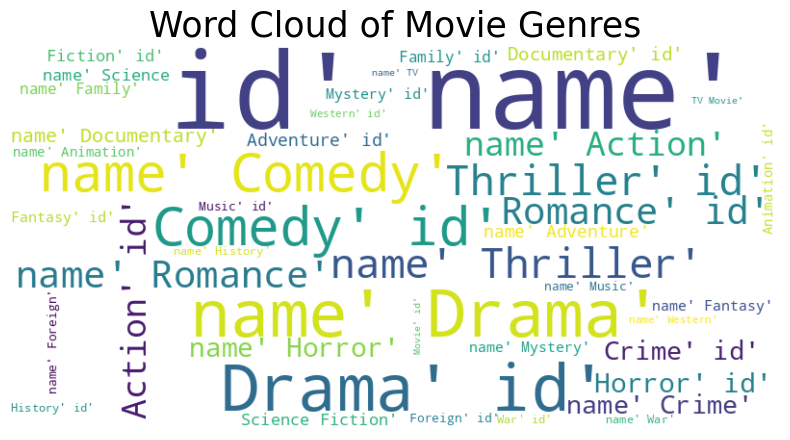

In [ ]:
from wordcloud import WordCloud

# Join all movie titles into a single string
titles_text = ' '.join(gen)

# Create a word cloud object and generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Genres',fontsize=25)
plt.show()


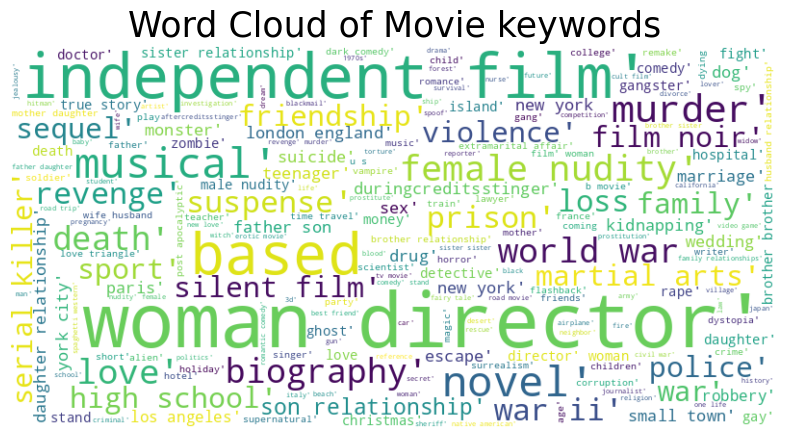

In [ ]:
keywords=new_df['keywords'].astype('str')
from wordcloud import WordCloud

# Join all movie titles into a single string
titles_text = ' '.join(keywords)

# Create a word cloud object and generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie keywords',fontsize=25)
plt.show()


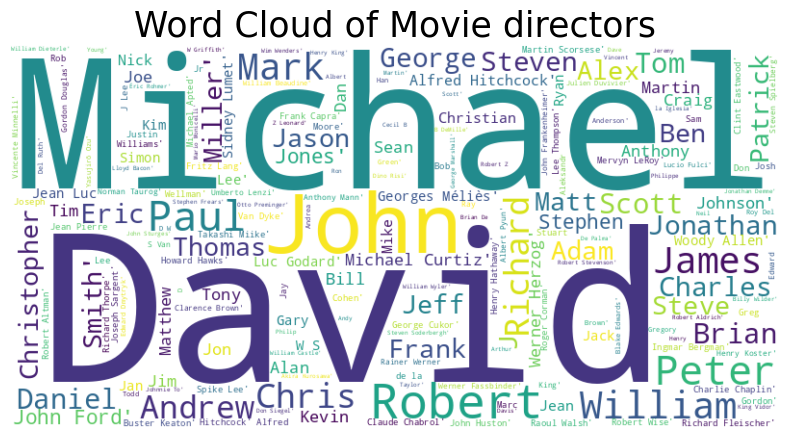

In [ ]:
director=new_df['director'].astype('str')
from wordcloud import WordCloud

# Join all movie titles into a single string
titles_text = ' '.join(director)

# Create a word cloud object and generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie directors',fontsize=25)
plt.show()


In [ ]:
new_df.corr()

,id,popularity,revenue,runtime,vote_average,vote_count,release_year,weighted_rating
id,1.000000,-0.082546,-0.071031,-0.118410,-0.146627,-0.064529,0.286846,-0.097266
popularity,-0.082546,1.000000,0.506200,0.129596,0.140740,0.559940,0.131693,0.434856
revenue,-0.071031,0.506200,1.000000,0.103955,0.079282,0.812014,0.088381,0.458647
runtime,-0.118410,0.129596,0.103955,1.000000,0.146768,0.113512,0.078718,0.148558
vote_average,-0.146627,0.140740,0.079282,0.146768,1.000000,0.118515,0.017174,0.296850
vote_count,-0.064529,0.559940,0.812014,0.113512,0.118515,1.000000,0.106813,0.661405
release_year,0.286846,0.131693,0.088381,0.078718,0.017174,0.106813,1.000000,0.040449
weighted_rating,-0.097266,0.434856,0.458647,0.148558,0.296850,0.661405,0.040449,1.000000





*   Popularity and vote count have a relatively strong positive correlation (0.56), indicating that movies with higher popularity tend to have more votes.
*   Revenue and vote count also show a strong positive correlation (0.81), suggesting that movies with higher revenue tend to attract more votes.

*   Vote average and weighted rating have a moderate positive correlation (0.30), indicating that movies with higher vote averages tend to have higher weighted ratings.
*   
Popularity and revenue have a moderate positive correlation (0.51), implying that movies with higher popularity may have a higher chance of generating revenue.

*   Runtime does not show a strong correlation with other variables, suggesting that the duration of a movie does not have a significant impact on its popularity, revenue, or vote count.

*   Release year and popularity have a weak positive correlation (0.13), indicating a slight increase in popularity over time, although other factors may have a more significant influence.






In [ ]:
#Mention Director 3 times to give it more weight relative to the entire cast.
#new_df['director'] = new_df['director'].apply(lambda x: [x,x, x])

We will do a small amount of pre-processing of our keywords before putting them to any use. As a first step, we calculate the frequenct counts of every keyword that appears in the dataset.

In [ ]:
new_df=new_df[['id','imdb_id','title','cast','director', 'genres', 'keywords','overview','tagline',  'popularity', 'release_year', 'vote_average', 'vote_count', 'weighted_rating' ]].reset_index(drop=True)



In [ ]:
new_df.head()

,id,imdb_id,title,cast,director,genres,keywords,overview,tagline,popularity,release_year,vote_average,vote_count,weighted_rating
0,862,tt0114709,Toy Story,"[Tom Hanks, Tim Allen, Don Rickles]",[John Lasseter],"[Animation, Comedy, Family]","[jealousy, toy, boy, friendship, friends, riva...","Led by Woody, Andy's toys live happily in his ...",,21.95,1995,7,5415,6.871918
1,8844,tt0113497,Jumanji,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",[Joe Johnston],"[Adventure, Fantasy, Family]","[board game, disappearance, based on children'...",When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,17.02,1995,6,2413,5.886535
2,15602,tt0113228,Grumpier Old Men,"[Walter Matthau, Jack Lemmon, Ann-Margret]",[Howard Deutch],"[Romance, Comedy]","[fishing, best friend, duringcreditsstinger, o...",A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,11.71,1995,6,92,5.378133
3,31357,tt0114885,Waiting to Exhale,"[Whitney Houston, Angela Bassett, Loretta Devine]",[Forest Whitaker],"[Comedy, Drama, Romance]","[based on novel, interracial relationship, sin...","Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,3.86,1995,6,34,5.299724
4,11862,tt0113041,Father of the Bride Part II,"[Steve Martin, Diane Keaton, Martin Short]",[Charles Shyer],[Comedy],"[baby, midlife crisis, confidence, aging, daug...",Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,8.39,1995,5,173,5.173411


In [ ]:
new_df.shape

(45366, 14)

In [ ]:
#remove spaces from name to make them single intity 
new_df['cast']=new_df['cast'].apply(lambda x: [i.replace(" ","") for i in x])
new_df['keywords']=new_df['keywords'].apply(lambda x: [i.replace(" ","") for i in x])
new_df['genres']=new_df['genres'].apply(lambda x: [i.replace(" ","") for i in x])
new_df['director']=new_df['director'].apply(lambda x: [i.replace(" ","") for i in x])

In [ ]:
import re

def preprocess_title(title):
    # Convert title to lowercase
    title = title.lower()
    
    # Remove leading and trailing white spaces
    title = title.strip()
    
    # Replace multiple consecutive spaces with a single space
    title = re.sub(r'\s+', ' ', title)
    
    # Remove any non-alphanumeric characters except spaces
    title = re.sub(r'[^a-zA-Z0-9\s]', '', title)
    
    return title


In [ ]:
new_df.to_csv('new_df.csv', index=False)

In [ ]:
#new_df['title']=new_df['title'].apply(preprocess_title)

In [ ]:
new_df.head(2)

,id,imdb_id,title,cast,director,genres,keywords,overview,tagline,popularity,release_year,vote_average,vote_count,weighted_rating
0,862,tt0114709,Toy Story,"[TomHanks, TimAllen, DonRickles]",[JohnLasseter],"[Animation, Comedy, Family]","[jealousy, toy, boy, friendship, friends, riva...","Led by Woody, Andy's toys live happily in his ...",,21.95,1995,7,5415,6.871918
1,8844,tt0113497,Jumanji,"[RobinWilliams, JonathanHyde, KirstenDunst]",[JoeJohnston],"[Adventure, Fantasy, Family]","[boardgame, disappearance, basedonchildren'sbo...",When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,17.02,1995,6,2413,5.886535


In [ ]:
top_movie=new_df[['title','release_year','vote_count','popularity','genres','weighted_rating']]

In [ ]:
top_movie=top_movie.sort_values('weighted_rating', ascending=False).head(250)

In [ ]:
top_movie.head(10)

,title,release_year,vote_count,popularity,genres,weighted_rating
15486,Inception,2010,14075,29.11,"[Action, Thriller, ScienceFiction, Mystery, Ad...",7.919031
12490,The Dark Knight,2008,12269,123.17,"[Drama, Action, Crime, Thriller]",7.907513
22858,Interstellar,2014,11187,32.21,"[Adventure, Drama, ScienceFiction]",7.898895
2845,Fight Club,1999,9678,63.87,[Drama],7.883796
4867,The Lord of the Rings: The Fellowship of the Ring,2001,8892,32.07,"[Adventure, Fantasy, Action]",7.873994
292,Pulp Fiction,1994,8670,140.95,"[Thriller, Crime]",7.870918
314,The Shawshank Redemption,1994,8358,51.65,"[Drama, Crime]",7.866333
7009,The Lord of the Rings: The Return of the King,2003,8226,29.32,"[Adventure, Fantasy, Action]",7.864294
351,Forrest Gump,1994,8147,48.31,"[Comedy, Drama, Romance]",7.863044
5821,The Lord of the Rings: The Two Towers,2002,7641,29.42,"[Adventure, Fantasy, Action]",7.854453


In [ ]:
#function that builds charts for particular genres.

In [ ]:
k = new_df.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
k.name = 'genre'
gen_df = new_df.drop('genres', axis=1).join(k)

In [ ]:

def gen_chart(genre, percentile=0.85):
    df = gen_df [gen_df ['genre'] == genre]
    vote_counts = df[df['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = df[df['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(percentile)
    
    top_movie = df[(df['vote_count'] >= m) & (df['vote_count'].notnull()) & (df['vote_average'].notnull())][['title', 'release_year', 'vote_count', 'vote_average', 'popularity']]
    top_movie['vote_count'] = top_movie['vote_count'].astype('int')
    top_movie['vote_average'] = top_movie['vote_average'].astype('int')
    
    top_movie['wr'] = top_movie.apply(lambda x: (x['vote_count']/(x['vote_count']+m) * x['vote_average']) + (m/(m+x['vote_count']) * C), axis=1)
    top_movie = top_movie.sort_values('wr', ascending=False).head(250)
    
    return top_movie

In [ ]:
gen_chart('Action').head(10)

,title,release_year,vote_count,vote_average,popularity,wr
15486,Inception,2010,14075,8,29.11,7.954982
12490,The Dark Knight,2008,12269,8,123.17,7.948476
4867,The Lord of the Rings: The Fellowship of the Ring,2001,8892,8,32.07,7.929396
7009,The Lord of the Rings: The Return of the King,2003,8226,8,29.32,7.923834
5821,The Lord of the Rings: The Two Towers,2002,7641,8,29.42,7.918171
256,Star Wars,1977,6778,8,42.15,7.908091
1156,The Empire Strikes Back,1980,5998,8,19.47,7.896576
4136,Scarface,1983,3017,8,11.30,7.801556
9437,Oldboy,2003,2000,8,10.62,7.710960
1911,Seven Samurai,1954,892,8,15.02,7.424928


top action movie is Inception

# Content Based Recommender

In [ ]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
links.shape

(9125, 3)

In [ ]:
links=links[links['tmdbId'].notnull()]['tmdbId'].astype('int')


In [ ]:
new_df3= new_df [new_df ['id'].isin(links)]

In [ ]:
new_df3.shape

(9096, 14)

we have 9096 movies

In [ ]:
#links=links.rename(columns={'movieId': 'id'})


In [ ]:
new_df3['overview'][0]

"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences."

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import pos_tag

contraction_mapping = {
    "'s": " is",
    "'t": " not",
    "'ve":" have",
    "'cause": "because",
    "'d": " would",
    "'d've": " would have",
    "'ll": " will",
    "how'd": "how did",
    "how'd'y": "how do you",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "'m": " am",
    "let's": "let us",
    "o'clock": "of the clock",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
}

def preprocess_text(text):
    # replace contractions with expanded forms
    for contraction, expansion in contraction_mapping.items():
        text = re.sub(r'\b' + contraction + r'\b', expansion, text)

    # convert to lowercase
    text = text.lower()

    # remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    tokens = word_tokenize(text)
    
    # remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    # lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    # join the tokens back into a single string with spaces
    preprocess_text = ' '.join([token + ' ' for token in lemmatized_tokens])
    
    return preprocess_text

In [ ]:
new_df3['overview'] = new_df3['overview'].apply(lambda x:x.split())

In [ ]:
new_df3['tagline'] = new_df3['tagline'].apply(lambda x:x.split())

In [ ]:
#new_df3['overview']=new_df3['overview'].apply(preprocess_text)

In [ ]:
#new_df3['tagline']=new_df3['tagline'].apply(preprocess_text)

In [ ]:
#new_df3['keywords']=new_df3['keywords'].apply(preprocess_text)

In [ ]:
#new_df3['release_year'] = pd.to_numeric(new_df3['release_year'], errors='coerce')



In [ ]:
new_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9096 entries, 0 to 40434
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               9096 non-null   int64  
 1   imdb_id          9096 non-null   object 
 2   title            9096 non-null   object 
 3   cast             9096 non-null   object 
 4   director         9096 non-null   object 
 5   genres           9096 non-null   object 
 6   keywords         9096 non-null   object 
 7   overview         9096 non-null   object 
 8   tagline          9096 non-null   object 
 9   popularity       9096 non-null   float64
 10  release_year     9096 non-null   int64  
 11  vote_average     9096 non-null   int64  
 12  vote_count       9096 non-null   int64  
 13  weighted_rating  9096 non-null   float64
dtypes: float64(2), int64(4), object(8)
memory usage: 1.3+ MB


In [ ]:
new_df3.head()

,id,imdb_id,title,cast,director,genres,keywords,overview,tagline,popularity,release_year,vote_average,vote_count,weighted_rating
0,862,tt0114709,Toy Story,"[TomHanks, TimAllen, DonRickles]",[JohnLasseter],"[Animation, Comedy, Family]","[jealousy, toy, boy, friendship, friends, riva...","[Led, by, Woody,, Andy's, toys, live, happily,...",[],21.95,1995,7,5415,6.871918
1,8844,tt0113497,Jumanji,"[RobinWilliams, JonathanHyde, KirstenDunst]",[JoeJohnston],"[Adventure, Fantasy, Family]","[boardgame, disappearance, basedonchildren'sbo...","[When, siblings, Judy, and, Peter, discover, a...","[Roll, the, dice, and, unleash, the, excitement!]",17.02,1995,6,2413,5.886535
2,15602,tt0113228,Grumpier Old Men,"[WalterMatthau, JackLemmon, Ann-Margret]",[HowardDeutch],"[Romance, Comedy]","[fishing, bestfriend, duringcreditsstinger, ol...","[A, family, wedding, reignites, the, ancient, ...","[Still, Yelling., Still, Fighting., Still, Rea...",11.71,1995,6,92,5.378133
3,31357,tt0114885,Waiting to Exhale,"[WhitneyHouston, AngelaBassett, LorettaDevine]",[ForestWhitaker],"[Comedy, Drama, Romance]","[basedonnovel, interracialrelationship, single...","[Cheated, on,, mistreated, and, stepped, on,, ...","[Friends, are, the, people, who, let, you, be,...",3.86,1995,6,34,5.299724
4,11862,tt0113041,Father of the Bride Part II,"[SteveMartin, DianeKeaton, MartinShort]",[CharlesShyer],[Comedy],"[baby, midlifecrisis, confidence, aging, daugh...","[Just, when, George, Banks, has, recovered, fr...","[Just, When, His, World, Is, Back, To, Normal....",8.39,1995,5,173,5.173411


In [ ]:
new_df3['summary']=new_df3['overview']+new_df3['tagline'] + new_df3['genres']+ 3*new_df3['keywords']+ new_df3['cast'] + 2* new_df3['director']

In [ ]:
new_df3

,id,imdb_id,title,cast,director,genres,keywords,overview,tagline,popularity,release_year,vote_average,vote_count,weighted_rating,summary
0,862,tt0114709,Toy Story,"[TomHanks, TimAllen, DonRickles]",[JohnLasseter],"[Animation, Comedy, Family]","[jealousy, toy, boy, friendship, friends, riva...","[Led, by, Woody,, Andy's, toys, live, happily,...",[],21.95,1995,7,5415,6.871918,"[Led, by, Woody,, Andy's, toys, live, happily,..."
1,8844,tt0113497,Jumanji,"[RobinWilliams, JonathanHyde, KirstenDunst]",[JoeJohnston],"[Adventure, Fantasy, Family]","[boardgame, disappearance, basedonchildren'sbo...","[When, siblings, Judy, and, Peter, discover, a...","[Roll, the, dice, and, unleash, the, excitement!]",17.02,1995,6,2413,5.886535,"[When, siblings, Judy, and, Peter, discover, a..."
2,15602,tt0113228,Grumpier Old Men,"[WalterMatthau, JackLemmon, Ann-Margret]",[HowardDeutch],"[Romance, Comedy]","[fishing, bestfriend, duringcreditsstinger, ol...","[A, family, wedding, reignites, the, ancient, ...","[Still, Yelling., Still, Fighting., Still, Rea...",11.71,1995,6,92,5.378133,"[A, family, wedding, reignites, the, ancient, ..."
3,31357,tt0114885,Waiting to Exhale,"[WhitneyHouston, AngelaBassett, LorettaDevine]",[ForestWhitaker],"[Comedy, Drama, Romance]","[basedonnovel, interracialrelationship, single...","[Cheated, on,, mistreated, and, stepped, on,, ...","[Friends, are, the, people, who, let, you, be,...",3.86,1995,6,34,5.299724,"[Cheated, on,, mistreated, and, stepped, on,, ..."
4,11862,tt0113041,Father of the Bride Part II,"[SteveMartin, DianeKeaton, MartinShort]",[CharlesShyer],[Comedy],"[baby, midlifecrisis, confidence, aging, daugh...","[Just, when, George, Banks, has, recovered, fr...","[Just, When, His, World, Is, Back, To, Normal....",8.39,1995,5,173,5.173411,"[Just, when, George, Banks, has, recovered, fr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39720,159550,tt0255313,The Last Brickmaker in America,"[SidneyPoitier, WendyCrewson, JayO.Sanders]",[GreggChampion],[Drama],"[friendship, brickmaking]","[A, man, must, cope, with, the, loss, of, his,...",[],0.04,2001,7,1,5.247946,"[A, man, must, cope, with, the, loss, of, his,..."
39940,392572,tt5165344,Rustom,"[AkshayKumar, IleanaD'Cruz, EshaGupta]",[TinuSureshDesai],"[Thriller, Romance]",[bollywood],"[Rustom, Pavri,, an, honourable, officer, of, ...","[Decorated, Officer., Devoted, Family, Man., D...",7.33,2016,7,25,5.341182,"[Rustom, Pavri,, an, honourable, officer, of, ..."
39993,402672,tt3859980,Mohenjo Daro,"[HrithikRoshan, PoojaHegde, KabirBedi]",[AshutoshGowariker],"[Adventure, Drama, History, Romance]",[bollywood],"[Village, lad, Sarman, is, drawn, to, big,, ba...",[],1.42,2016,6,26,5.287330,"[Village, lad, Sarman, is, drawn, to, big,, ba..."
40156,315011,tt4262980,Shin Godzilla,"[HirokiHasegawa, YutakaTakenouchi, SatomiIshih...",[HideakiAnno],"[Action, Adventure, Drama, Horror, ScienceFict...","[monster, godzilla, giantmonster, destruction,...","[From, the, mind, behind, Evangelion, comes, a...","[A, god, incarnate., A, city, doomed.]",9.29,2016,6,152,5.442687,"[From, the, mind, behind, Evangelion, comes, a..."


In [ ]:
new_df3['summary'][0]

['Led',
 'by',
 'Woody,',
 "Andy's",
 'toys',
 'live',
 'happily',
 'in',
 'his',
 'room',
 'until',
 "Andy's",
 'birthday',
 'brings',
 'Buzz',
 'Lightyear',
 'onto',
 'the',
 'scene.',
 'Afraid',
 'of',
 'losing',
 'his',
 'place',
 'in',
 "Andy's",
 'heart,',
 'Woody',
 'plots',
 'against',
 'Buzz.',
 'But',
 'when',
 'circumstances',
 'separate',
 'Buzz',
 'and',
 'Woody',
 'from',
 'their',
 'owner,',
 'the',
 'duo',
 'eventually',
 'learns',
 'to',
 'put',
 'aside',
 'their',
 'differences.',
 'Animation',
 'Comedy',
 'Family',
 'jealousy',
 'toy',
 'boy',
 'friendship',
 'friends',
 'rivalry',
 'boynextdoor',
 'newtoy',
 'toycomestolife',
 'jealousy',
 'toy',
 'boy',
 'friendship',
 'friends',
 'rivalry',
 'boynextdoor',
 'newtoy',
 'toycomestolife',
 'jealousy',
 'toy',
 'boy',
 'friendship',
 'friends',
 'rivalry',
 'boynextdoor',
 'newtoy',
 'toycomestolife',
 'TomHanks',
 'TimAllen',
 'DonRickles',
 'JohnLasseter',
 'JohnLasseter']

In [ ]:
new_df4=new_df3[['id','title','summary','imdb_id']]

In [ ]:
new_df4['summary']=new_df4['summary'].apply(lambda x: " ".join(x))

In [ ]:
new_df4['summary'][0]

"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences. Animation Comedy Family jealousy toy boy friendship friends rivalry boynextdoor newtoy toycomestolife jealousy toy boy friendship friends rivalry boynextdoor newtoy toycomestolife jealousy toy boy friendship friends rivalry boynextdoor newtoy toycomestolife TomHanks TimAllen DonRickles JohnLasseter JohnLasseter"

In [ ]:
new_df4['summary']=new_df4['summary'].apply(preprocess_text)

In [ ]:
new_df4['summary'][10]

'widowed  u  president  andrew  shepherd  one  world  powerful  men  anything  want  covets  sydney  ellen  wade  washington  lobbyist  shepherd  attempt  courting  spark  wild  rumor  decimate  approval  rating  powerful  man  world  one  thing  want  comedy  drama  romance  whitehouse  usapresident  newlove  widower  wildlifeconservation  whitehouse  usapresident  newlove  widower  wildlifeconservation  whitehouse  usapresident  newlove  widower  wildlifeconservation  michaeldouglas  annettebening  michaeljfox  robreiner  robreiner '

In [ ]:
new_df4['summary'][0]

'led  woody  andy  toy  live  happily  room  andy  birthday  brings  buzz  lightyear  onto  scene  afraid  losing  place  andy  heart  woody  plot  buzz  circumstance  separate  buzz  woody  owner  duo  eventually  learns  put  aside  difference  animation  comedy  family  jealousy  toy  boy  friendship  friend  rivalry  boynextdoor  newtoy  toycomestolife  jealousy  toy  boy  friendship  friend  rivalry  boynextdoor  newtoy  toycomestolife  jealousy  toy  boy  friendship  friend  rivalry  boynextdoor  newtoy  toycomestolife  tomhanks  timallen  donrickles  johnlasseter  johnlasseter '

In [ ]:
from nltk.stem.porter import PorterStemmer
porter=PorterStemmer()

In [ ]:

def stem(text):
  x=[]
  for i in text.split():
    x.append(porter.stem(i))
  return " ".join(x)


In [ ]:
new_df4['summary']=new_df4['summary'].apply(stem)

In [ ]:
new_df4.shape

(9096, 4)

In [ ]:
new_df4.head()

,id,title,summary,imdb_id
0,862,Toy Story,led woodi andi toy live happili room andi birt...,tt0114709
1,8844,Jumanji,sibl judi peter discov enchant board game open...,tt0113497
2,15602,Grumpier Old Men,famili wed reignit ancient feud nextdoor neigh...,tt0113228
3,31357,Waiting to Exhale,cheat mistreat step woman hold breath wait elu...,tt0114885
4,11862,Father of the Bride Part II,georg bank recov daughter wed receiv news preg...,tt0113041


In [ ]:
#new_df4.to_csv('dff.csv', index=False)

In [ ]:
new_df4.shape 

(9096, 4)

In [ ]:
new_df4.duplicated().sum()

14

In [ ]:

new_df4.drop_duplicates(inplace=True)



In [ ]:
#new_df4['title']=new_df4['title'].apply(preprocess_title)